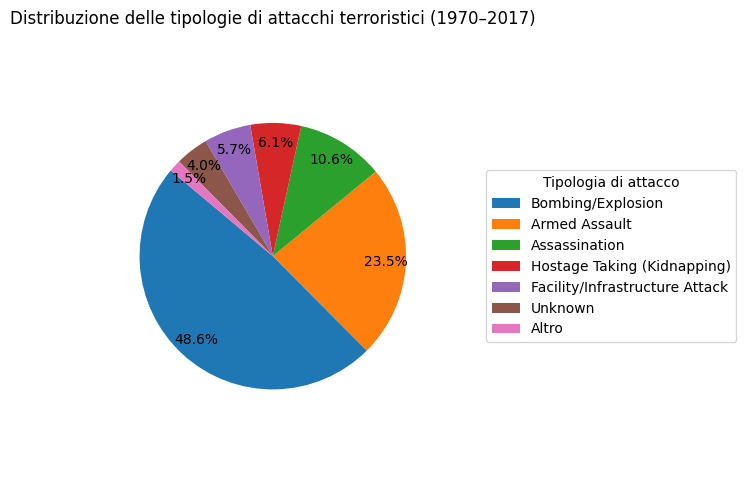

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Carica il dataset
df = pd.read_csv('../../data/globalterrorismdb.csv', encoding='latin1', low_memory=False)

# Conta le tipologie di attacco
attack_types = df['attacktype1_txt'].value_counts()

# Calcola il totale
total = attack_types.sum()

# Raggruppa sotto 1% in "Altro"
threshold = 0.01
attack_types_grouped = attack_types[attack_types / total >= threshold]
other_sum = attack_types[attack_types / total < threshold].sum()
attack_types_grouped["Altro"] = other_sum

# Dati
labels = attack_types_grouped.index
sizes = attack_types_grouped.values

# Plot
plt.figure(figsize=(7,5))
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85
)

# Legenda
plt.legend(wedges, labels, title="Tipologia di attacco", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribuzione delle tipologie di attacchi terroristici (1970–2017)')
plt.axis('equal') 
plt.tight_layout()
plt.show()

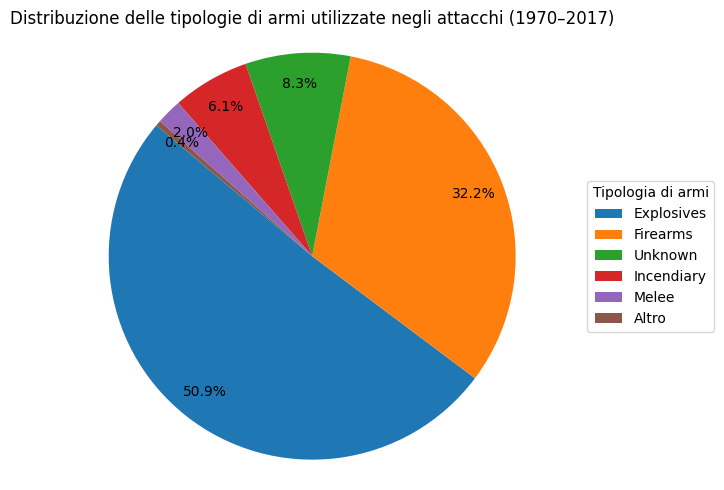

In [16]:
# Conta le tipologie di armi
weapon_types = df['weaptype1_txt'].value_counts()

# Calcola il totale
total = weapon_types.sum()

# Crea nuova serie con "Altro" per quelli sotto l'1%
threshold = 0.01  # 1%
weapon_types_grouped = weapon_types[weapon_types / total >= threshold]
other_sum = weapon_types[weapon_types / total < threshold].sum()

# Aggiunge "Altro"
weapon_types_grouped["Altro"] = other_sum

# Dati
labels = weapon_types_grouped.index
sizes = weapon_types_grouped.values

# Plot
plt.figure(figsize=(7,5))
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=None, # niente etichette interne
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85
)

# Legenda
plt.legend(wedges, labels, title="Tipologia di armi", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribuzione delle tipologie di armi utilizzate negli attacchi (1970–2017)')
plt.axis('equal') 
plt.tight_layout()
plt.show()

/var/folders/1p/h1qfnx2d6ps1y_cqnnphbg_00000gn/T/ipykernel_2447/4210843748.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  num_matrix = heatmap_data.replace(type_to_num)


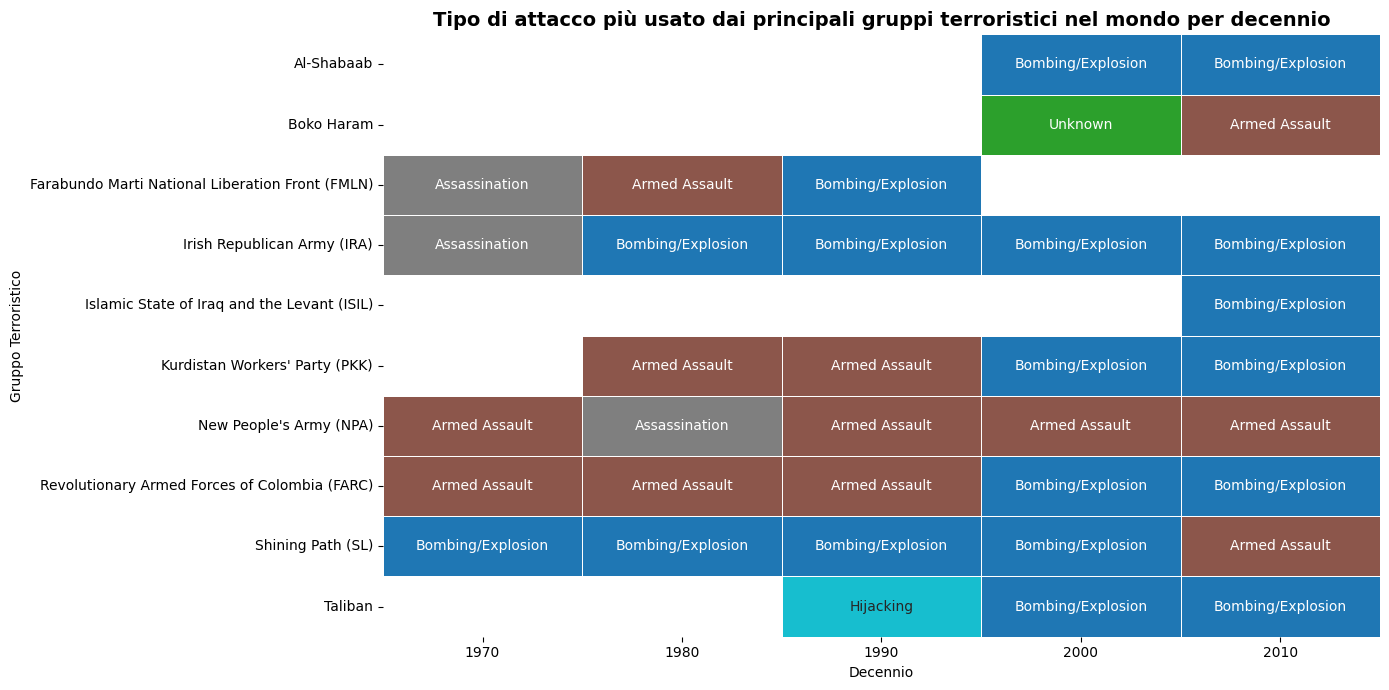

In [12]:
import seaborn as sns

# Colonne utili
df = df[['iyear', 'gname', 'attacktype1_txt']]
df = df[df['gname'] != 'Unknown']
df = df.dropna(subset=['attacktype1_txt'])

# Aggiungi decennio
df['decade'] = (df['iyear'] // 10) * 10

# Top 10 gruppi globali
top_groups = df['gname'].value_counts().head(10).index.tolist()
df_top = df[df['gname'].isin(top_groups)]

# Tipo di attacco più comune per gruppo e decennio
most_common_attack = df_top.groupby(['gname', 'decade'])['attacktype1_txt'] \
                           .agg(lambda x: x.value_counts().idxmax()).reset_index()

# Pivot per heatmap
heatmap_data = most_common_attack.pivot(index='gname', columns='decade', values='attacktype1_txt')

# Mappatura tipo -> indice colore
attack_types = pd.Series(heatmap_data.stack().unique()).dropna()
type_to_num = {attack: i for i, attack in enumerate(attack_types)}
num_matrix = heatmap_data.replace(type_to_num)

# Plot
plt.figure(figsize=(14,7))
ax = sns.heatmap(num_matrix, annot=heatmap_data, fmt='', cmap='tab10', linewidths=.5, cbar=False)

plt.title('Tipo di attacco più usato dai principali gruppi terroristici nel mondo per decennio', fontsize=14, weight='bold')
plt.xlabel('Decennio')
plt.ylabel('Gruppo Terroristico')
plt.tight_layout()
plt.show()